<a href="https://colab.research.google.com/github/kosiyyu/ml/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
from tensorflow.keras.activations import softmax
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [35]:
ds = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = ds.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

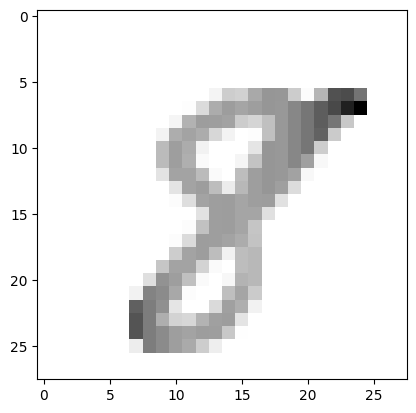

In [36]:
plt.imshow(x_train[55], cmap = plt.cm.binary)
plt.show()

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8684 - loss: 0.4628
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9660 - loss: 0.1146
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9764 - loss: 0.0755
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9838 - loss: 0.0522
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0375


In [42]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0975
0.08669153600931168 0.975600004196167


In [76]:
model.save('my_model.keras')

In [77]:
new_model = load_model('my_model.keras', custom_objects={'softmax_v2': softmax})

In [65]:
predictions = new_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


| NUMBER: 7
V


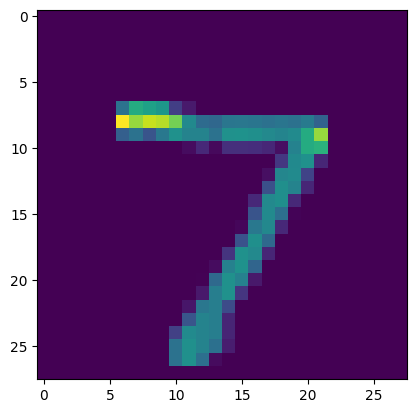

| NUMBER: 2
V


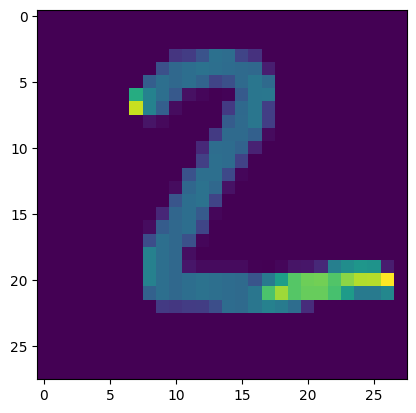

| NUMBER: 1
V


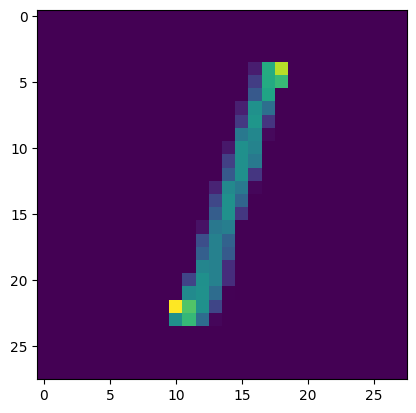

| NUMBER: 0
V


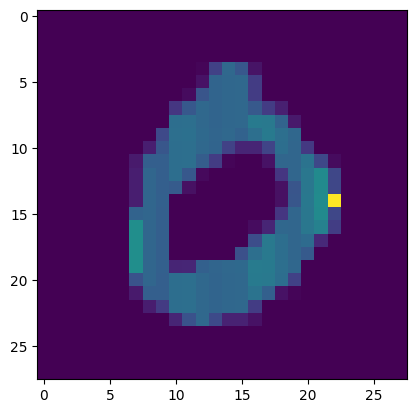

| NUMBER: 4
V


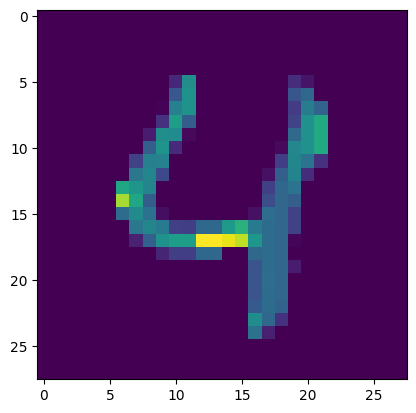

| NUMBER: 1
V


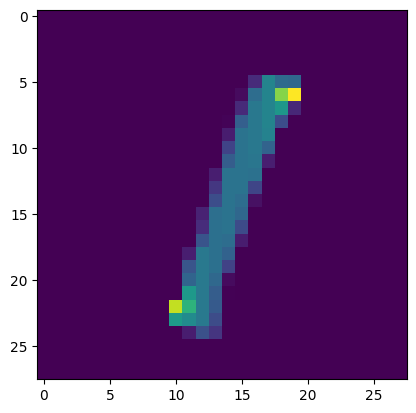

| NUMBER: 4
V


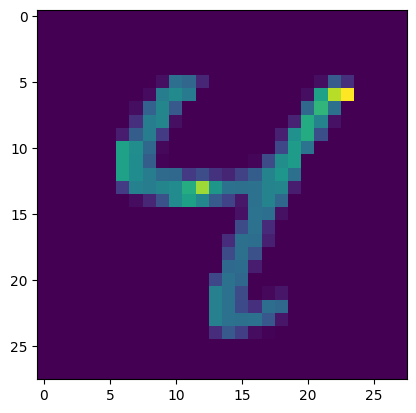

| NUMBER: 9
V


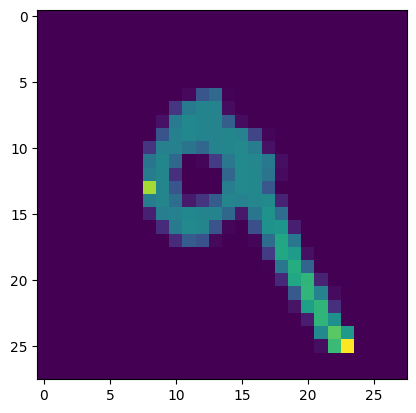

| NUMBER: 5
V


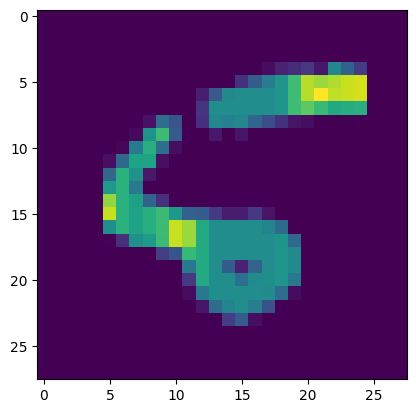

| NUMBER: 9
V


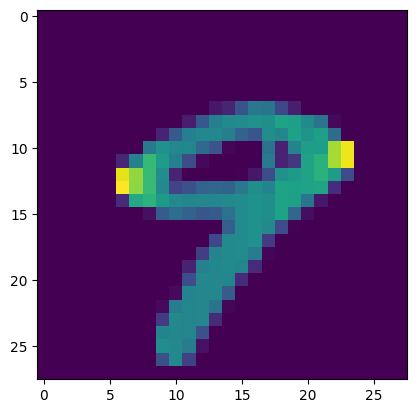

| NUMBER: 0
V


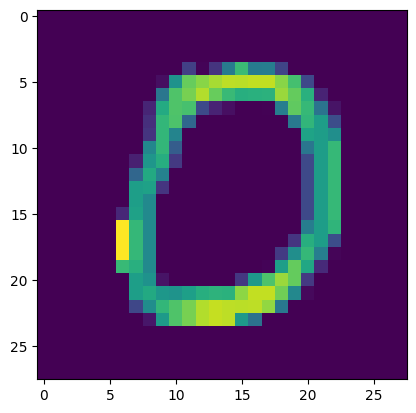

| NUMBER: 6
V


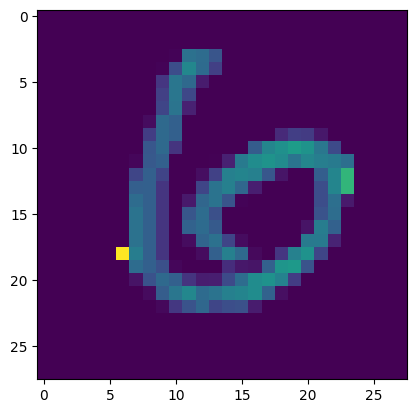

| NUMBER: 9
V


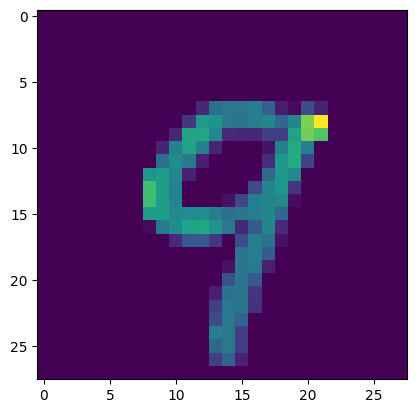

| NUMBER: 0
V


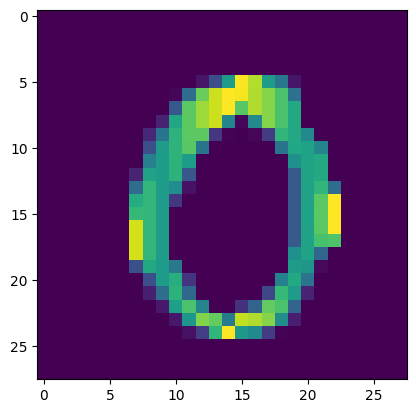

In [74]:
for i in range(0, 14):
  print('|', 'NUMBER:',np.argmax(predictions[i]))
  print('V')
  plt.imshow(x_test[i])
  plt.show()